In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
import random

In [2]:
class AgentState(TypedDict):
    name: str
    target_number: int
    guesses: List[int]
    attempts: int
    hint: str
    lower_bound: int
    upper_bound: int

In [3]:
def setup_node(state: AgentState) -> AgentState:
    state["name"] = f"Welcome to the game, {state["name"]}"
    state["target_number"] = random.randint(1,20)
    state["guesses"] = []
    state["attempts"] = 0
    state["hint"] = ""
    print(f"Player has begun the game to guess {state["target_number"]}")
    print(f"Trying to match the number --> {state["target_number"]}")
    return state

In [9]:
def guess(state: AgentState) -> AgentState:
    """Guess the number"""
    if state["hint"] == "lower":
        state["lower_bound"] = state["guesses"][-1]
    elif state["hint"] == "higher":
        state["upper_bound"] = state["guesses"][-1]
    options = [i for i in range(state["lower_bound"], state["upper_bound"]+1) if i not in state["guesses"]]
    guess_number = random.choice(options)
    state["guesses"].append(guess_number)
    state["attempts"] += 1
    print(f"Guessed {guess_number} Between {state["lower_bound"]} and {state["upper_bound"]}")
    return state

In [10]:
def hint(state: AgentState) -> AgentState:
    if (state["guesses"][-1] > state["target_number"]):
        state["hint"] = "higher"
    elif (state["guesses"][-1] < state["target_number"]):
        state["hint"] = "lower"
    return state

def check_game_status(state: AgentState) -> AgentState:
    if state["attempts"] > 7:
        print("Max attempts done")
        return "exit"
    if state["guesses"][-1] == state["target_number"]:
        print("Matched")
        return "exit"
    if state["guesses"][-1] != state["target_number"]:
        return "loop"

In [11]:
graph = StateGraph(AgentState)
graph.add_node("setup", setup_node)
graph.add_node("guess", guess)
graph.add_node("hint", hint)
graph.add_edge(START, "setup")
graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint")
graph.add_conditional_edges("hint", check_game_status, {"exit": END, "loop":"guess"})
graph.add_edge("hint", END)
app = graph.compile()

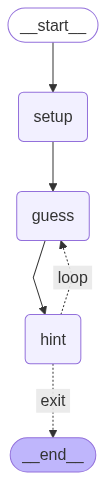

In [12]:
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
result = app.invoke({"name": "player", "lower_bound": 1, "upper_bound": 20})
print(result)

Player has begun the game to guess 5
Trying to match the number --> 5
Guessed 14 Between 1 and 20
Guessed 8 Between 1 and 14
Guessed 2 Between 1 and 8
Guessed 3 Between 2 and 8
Guessed 7 Between 3 and 8
Guessed 6 Between 3 and 7
Guessed 4 Between 3 and 6
Guessed 5 Between 4 and 6
Max attempts done
{'name': 'Welcome to the game, player', 'target_number': 5, 'guesses': [14, 8, 2, 3, 7, 6, 4, 5], 'attempts': 8, 'hint': 'lower', 'lower_bound': 4, 'upper_bound': 6}
